In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.gridspec as gridspec

sns.set(palette='colorblind')
sys.path.insert(0, 'reports/code_blocks/')
import reflectometry as refl

ModuleNotFoundError: No module named 'reflectometry'

In [38]:
import matplotlib as mpl
# Default parameters for matplotlib plots
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.grid'] = True
#mpl.rcParams['grid.color'] = (0.8, 0.8, 0.8)
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'

In [39]:
x = np.arange(-10, 10, 0.01)
y = np.ones_like(x) * 2.0719e-6
for i in range(0, len(x)):
    if x[i] < 0:
        y[i] = 0

In [40]:
x2 = np.array(x[:-1])
y2 = np.array(x[:-1])
for i in range(0, len(x)-1):
    y2[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])

In [41]:
q = np.arange(0.0005, 0.101, 0.0005)
r = np.zeros_like(q)
for i in range(0, len(q)):
    r[i] = np.sum((y2 * np.exp(-1j * x2 * q[i])) ** 2)
    r[i] *= 16 * np.pi ** 2
    r[i] /= q[i] ** 4

/home/arm61/miniconda3/envs/thesis/lib/python3.7/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


In [ ]:
plt.figure(figsize=(5, 25/6))
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
ax.plot(x, y*1e6)
ax.set_xlabel(r'$z$/Å')
ax.set_ylabel(r'$\rho(z)$/$\times10^{-6}$ Å$^{-2}$')
ax.set_xlim([-10, 10])
ax.set_xticks(np.arange(-10, 15, 5))
ax.text(0.1, 0.92, '(a)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax = plt.subplot(gs[0, 1])
ax.plot(x2, y2*1e4)
ax.set_xlabel(r'$z$/Å')
ax.set_ylabel(r"$\rho'(z)$/$\times10^{-6}$ Å$^{-3}$")
ax.set_xlim([-10, 10])
ax.set_xticks(np.arange(-10, 15, 5))
ax.text(0.1, 0.92, '(b)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax = plt.subplot(gs[1, :])
ra = refl.abeles(q, np.array([0, 2.0719e-6]), np.array([10, 10]))
ax.plot(q, r * ra[-1]/r[-1], zorder=10)
ax.plot(q, np.ones_like(q), lw=1)
ax.set_xlabel(r'$q$/Å$^{-1}$')
ax.set_ylabel(r'$R(q)$')
ax.text(0.05, 0.92, '(c)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax.set_yscale('log')
ax.set_xlim([0, 0.1])
plt.tight_layout()
plt.savefig('reports/figures/theory/kine.pdf')
plt.close()

In [ ]:
x = np.arange(-10, 10, 0.01)
y = np.ones_like(x) * 2.0719e-6
for i in range(0, len(x)):
    if x[i] < 0:
        y[i] = 0
        
x2 = np.array(x[:-1])
y2 = np.array(x[:-1])
for i in range(0, len(x)-1):
    y2[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    
q = np.arange(0.0005, 0.101, 0.0005)
r = np.zeros_like(q)
for i in range(0, len(q)):
    r[i] = np.sum((y2 * np.exp(-1j * x2 * q[i])) ** 2)
    r[i] *= 16 * np.pi ** 2
    r[i] /= q[i] ** 4

plt.figure(figsize=(5, 25/11))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, :])
ra = refl.abeles(q, np.array([0, 2.0719e-6]), np.array([10, 10]))
ax.plot(q, ra, '--', zorder=10, c='#029E73')
ax.plot(q, r * ra[-1]/r[-1], zorder=9, c='#0173B2')
ax.plot(q, np.ones_like(q), c='#DE8F05', lw=1)
ax.set_xlabel(r'$q$/Å$^{-1}$')
ax.set_ylabel(r'$R(q)$')
ax.set_yscale('log')
ax.set_xlim([0, 0.1])
plt.tight_layout()
plt.savefig('reports/figures/theory/dyna.pdf')
plt.close()

/home/arm61/miniconda3/envs/thesis/lib/python3.7/site-packages/ipykernel/__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


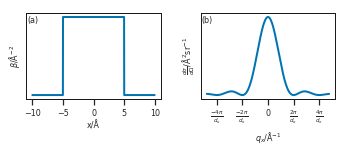

In [77]:
x = np.arange(-10, 10, 0.005)
beta = np.zeros_like(x)
beta[np.where((x >= -5) & (x < 5))] = 1
qx = np.arange(-1.5, 1.5, 0.001)
dsc = np.zeros_like(qx)
for i, q in enumerate(qx):
    dsc[i] = np.sum(beta * np.exp(1j * q * x)) ** 2
plt.figure(figsize=(5, 25/11))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
ax.plot(x,beta)
ax.set_yticks([0])
ax.set_xlabel(r'x/Å')
ax.set_ylabel(r'$\beta/$Å$^{-2}$')
ax.text(0.075, 0.92, '(a)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax = plt.subplot(gs[0, 1])
ax.plot(qx, dsc)
ax.set_yticks([0])
ax.set_xticks([-1.2566, -0.6283, 0, 0.6283, 1.2566])
ax.set_xticklabels([r'$\frac{-4\pi}{d_x}$', r'$\frac{-2\pi}{d_x}$', 0, r'$\frac{2\pi}{d_x}$', r'$\frac{4\pi}{d_x}$'])
ax.set_xlabel(r'$q_x$/Å$^{-1}$')
ax.set_ylabel(r'$\frac{d\sigma}{d\Omega}$/Å$^{2}$')
ax.text(0.075, 0.92, '(b)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
plt.tight_layout()
plt.savefig('reports/figures/theory/scales.pdf')